In [37]:
%matplotlib notebook
%config InlineBackend.figure_format='retina'
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
import sklearn as skl
import sklearn.metrics
import sklearn.learning_curve
import sklearn.ensemble
import sklearn.dummy
import sklearn.grid_search
import sklearn.feature_extraction
import sklearn.feature_extraction.text
import sklearn.calibration
import numpy as np
import pickle

import sys
sys.path = sys.path + ['..']
import get_airbnb_data
import db
import learning
import imp
imp.reload(learning)
from learning import *

In [2]:
clf = pickle.load(open('../pipe2.pkl', 'rb'))

#Feature importance

([<matplotlib.axis.YTick at 0x7fe769ae4128>,
 <a list of 10 Text yticklabel objects>)

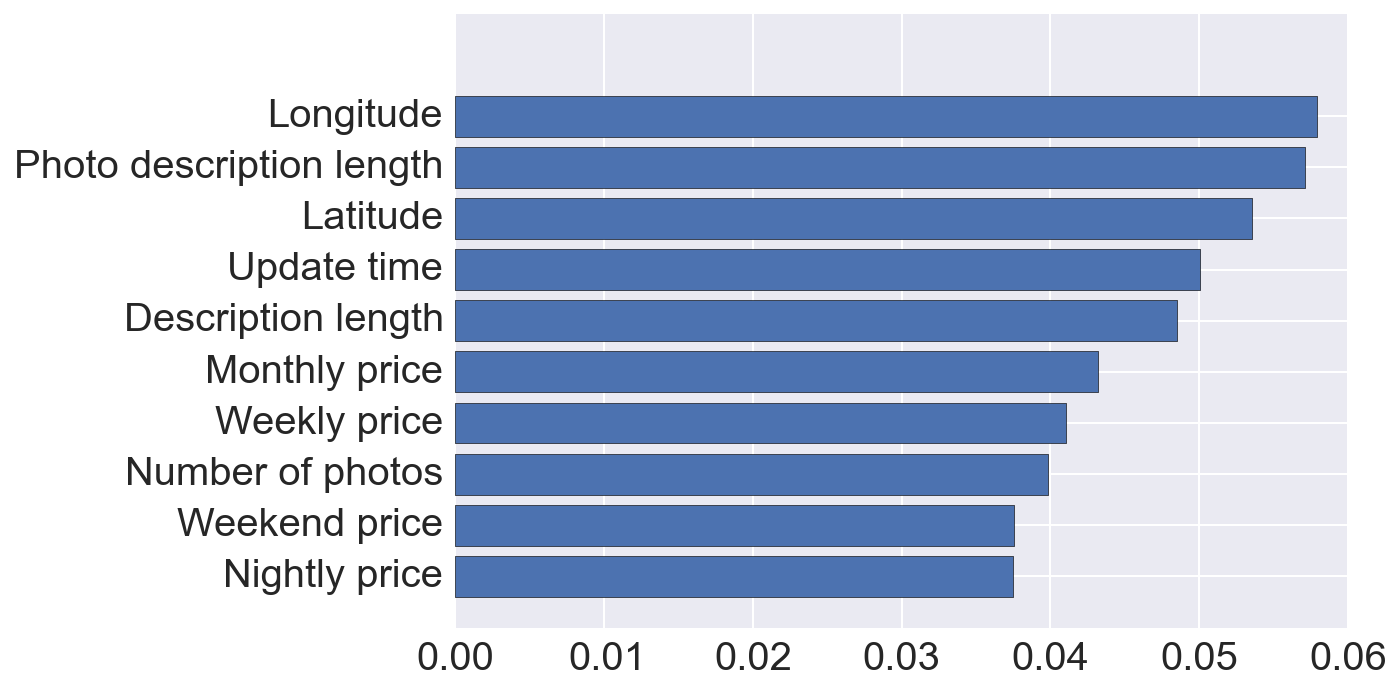

In [13]:
sns.set_context('notebook', font_scale=2)
importance = clf.base_estimator.named_steps['clf'].feature_importances_
ind = importance.argsort()[::-1]  # reverse order
n_features_plot = 10
names = ['Longitude', 'Photo description length', 'Latitude', 'Update time', 
         'Description length', 'Monthly price', 'Weekly price', 'Number of photos',
        'Weekend price', 'Nightly price']
yvals = range(n_features_plot, 0, -1)
plt.barh(yvals, importance[ind][:n_features_plot], align='center')
plt.yticks(yvals, names)

In [10]:
c1 = clf.calibrated_classifiers_[0]

In [11]:
c1.base_estimator

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

#Learning curve for split at 4.25

In [14]:
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')
Xtr, Xte, ytr, yte = get_training_test_set(rawtable, make_features=make_features5, 
                                               categorize_rating=categorize_rating2)

In [15]:
clf_dummy = get_dummy_clf()

In [16]:
clf2 = get_random_forest_clf2()

<module 'matplotlib.pyplot' from '/home/ibuder/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py'>

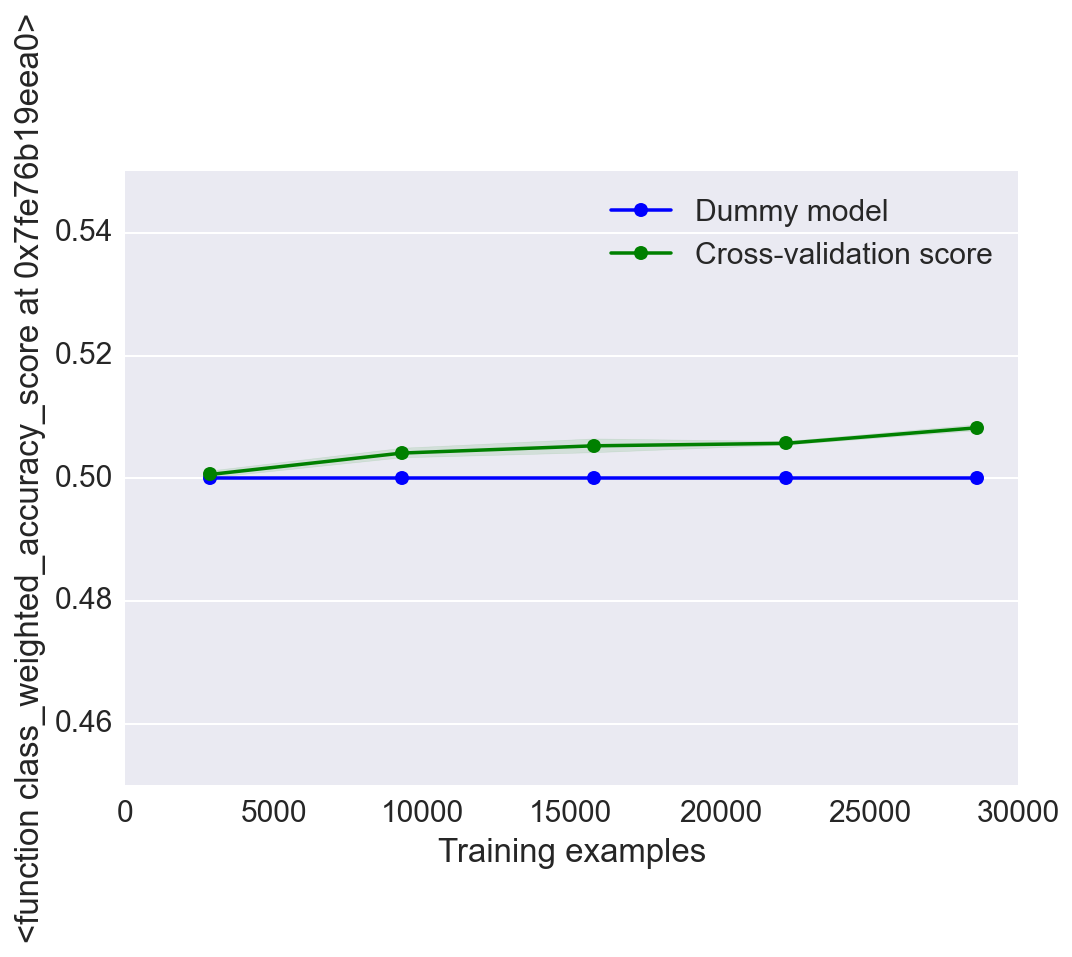

In [18]:
sns.set_context('notebook', font_scale=1.5)
plot_learning_curve(clf2, "", Xtr, ytr, dummy=clf_dummy, 
                    scoring=class_weighted_accuracy_score, ylim=[0.45, 0.55], n_jobs=1, plot_train=False)

#Geographical clustering

In [19]:
rating5_ind = rawtable.rating == 5
rating45_ind = rawtable.rating == 4.5

<IPython.core.display.Javascript object>


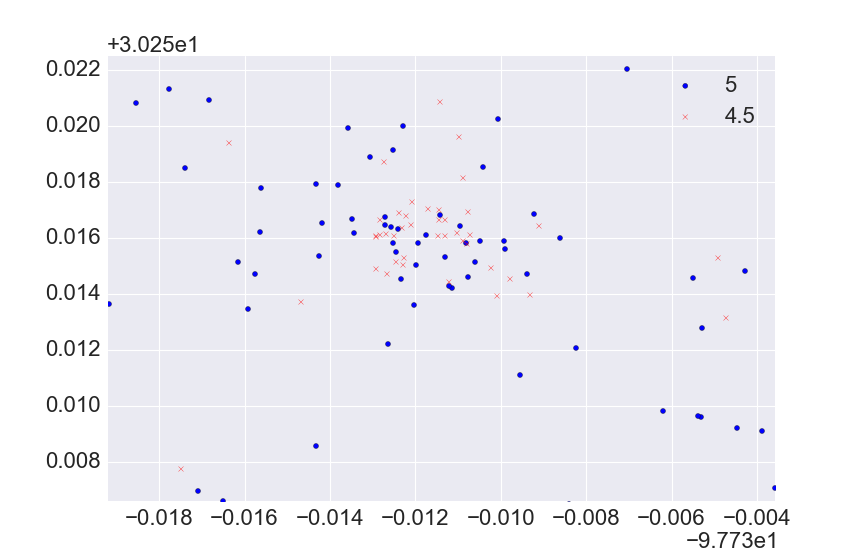

In [38]:
sns.set_context('notebook', font_scale=2)
plt.scatter(rawtable.lng[rating5_ind], rawtable.lat[rating5_ind], label='5')
plt.hold(True)
plt.scatter(rawtable.lng[rating45_ind], rawtable.lat[rating45_ind], marker='x', color='r', label='4.5')
plt.legend()